In [181]:
import sys, os

import random
import statistics as stat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nilmtk
from nilmtk.preprocessing import Clip

sys.path.append(os.path.dirname(os.getcwd()))

In [182]:
import adinilm.functions as F
from adinilm.enumerations import *
from adinilm.objs import DatasetProfile, ProfileHandler, NormalizationHandler
from adinilm.utils import paths_manager as pathsman
from adinilm.stats.Statistical_analysis import extract_states, state_plot

In [183]:
## Variable declaration for dataset
BUILDING = 1
START_TIME = "2015-01-01"
# END_TIME = "2015-01-15"
END_TIME = "2015-03-31"

FRIDGE_FREEZER = "fridge"
KETTLE = "kettle"
DISHWASHER = "dish washer"
MICROWAVE = "microwave"
WASHER_DRYER = "washer dryer"

applist = [FRIDGE_FREEZER, WASHER_DRYER, KETTLE, DISHWASHER, MICROWAVE]

In [184]:
## Dataset initialization
dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
dataset.set_window(start=START_TIME, end=END_TIME)

In [185]:
def quantile_filter_2(sequence_length, data, p=50):
    new_mains = F.scan_sequences(data=data, mode="odd_window", seq_len=sequence_length)
    new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")
    return new_mains

In [186]:
clipper = Clip()
clipper.lower = 0
clipper.upper = 2500

In [187]:
power_elec = dataset.buildings[BUILDING].elec

In [188]:
print(f"Activation stats in the period [{START_TIME}, {END_TIME}]")
row = []

for app in applist:
    col = []
    app_name = app.upper()
    activations = power_elec[app].get_activations()
    total_num = len(activations)
    average_length = stat.mean(map(len, activations))
    max_length = max(map(len, activations))
    min_length = min(map(len, activations))
    col.append(total_num)
    col.append(average_length)
    col.append(max_length)
    col.append(min_length)
    row.append(col)

pd.DataFrame(row, columns=["No. of Activations", "Average Length", "Max Length", "Min Length"], index=applist)

Activation stats in the period [2015-01-01, 2015-03-31]


,No. of Activations,Average Length,Max Length,Min Length
fridge,2118,248.895656,3570,53
washer dryer,98,1008.918367,1308,246
kettle,464,27.193966,103,7
dish washer,31,1103.806452,1181,1020
microwave,812,18.865764,142,7


In [189]:
info = {
        "subsection" : {
                "building" : BUILDING,
                "start_time" : START_TIME,
                "end_time": END_TIME
        },
        "preprocessing" : [
                {
                        "activation_extension" : {
                                "mode" : "randomizer",
                                "num_full_samples" : 1200000
                        }
                },
                {
                        "normalization" : {
                                "mode" : "minmax",
                                "scope" : "local"
                        }
                }
        ],
        "appliances" : [FRIDGE_FREEZER, WASHER_DRYER, KETTLE, DISHWASHER, MICROWAVE],
        "appliance_data" : {
                FRIDGE_FREEZER : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                WASHER_DRYER : {               
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                KETTLE : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                DISHWASHER : {
                        "window" : 10,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                },
                MICROWAVE : {
                        "window" : 50,
                        "min" : 0,
                        "max" : 0,
                        "on_power_threshold" : 10,
                }
        }
}

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


<Axes: >

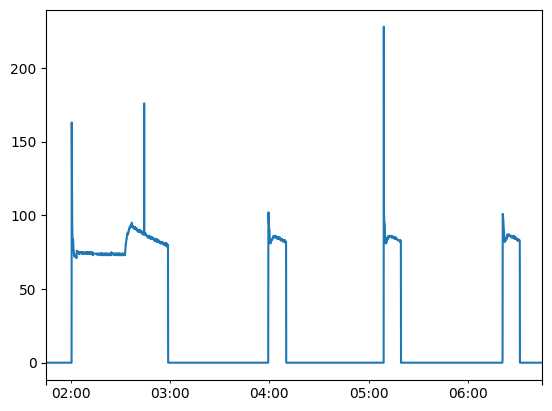

In [190]:
# Artificial Generation of Data

WINDOW_LEN = 3000

# Fridge
fridge_series = power_elec[FRIDGE_FREEZER].power_series_all_data(resample=True, sample_period=6, preprocessing = [clipper], ac_type='best').iloc[1050:1050+WINDOW_LEN]
fridge_series.plot()

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


<Axes: >

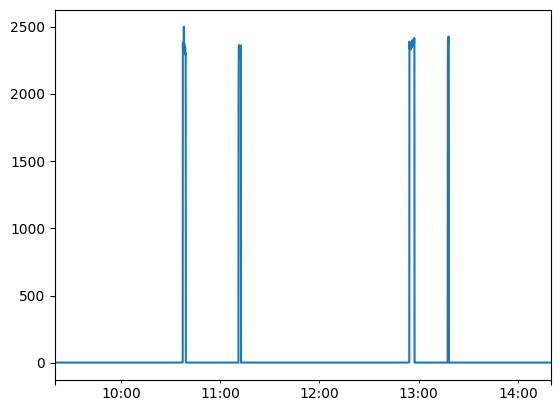

In [191]:
kettle_series = power_elec[KETTLE].power_series_all_data(resample=True, sample_period=6, preprocessing = [clipper], ac_type='best')
start = 1100000
kettle_series = kettle_series.iloc[start :start+WINDOW_LEN]
kettle_series.plot()

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


<Axes: >

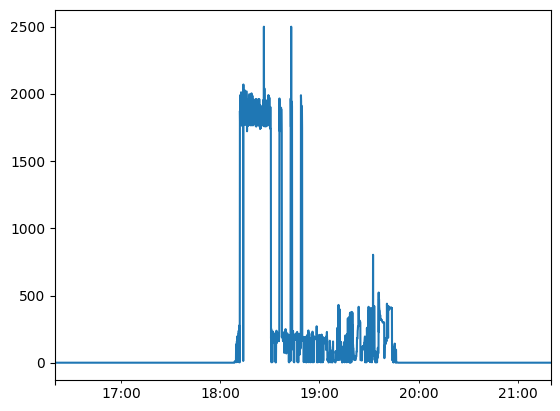

In [192]:
wm_series = power_elec[WASHER_DRYER].power_series_all_data(resample=True, sample_period=6, preprocessing = [clipper], ac_type='best')

start = 1205000
wm_series = wm_series.iloc[start : start+WINDOW_LEN]

wm_series.plot()

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


<Axes: >

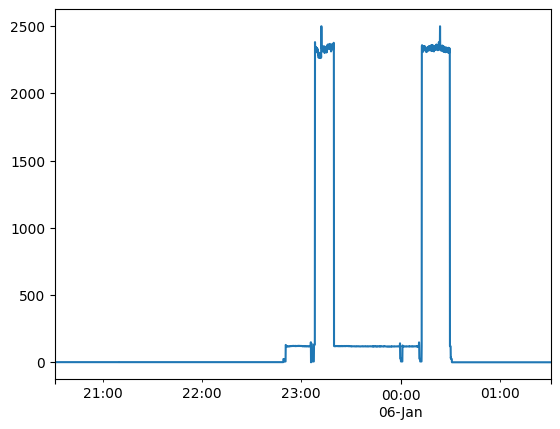

In [193]:
dw_series = power_elec[DISHWASHER].power_series_all_data(resample=True, sample_period=6, preprocessing = [clipper], ac_type='best')

dw_series = dw_series.loc["2015-01-05-20:30" : "2015-01-06-01:30"]
dw_series = dw_series.iloc[-WINDOW_LEN:]

dw_series.plot()

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


<Axes: >

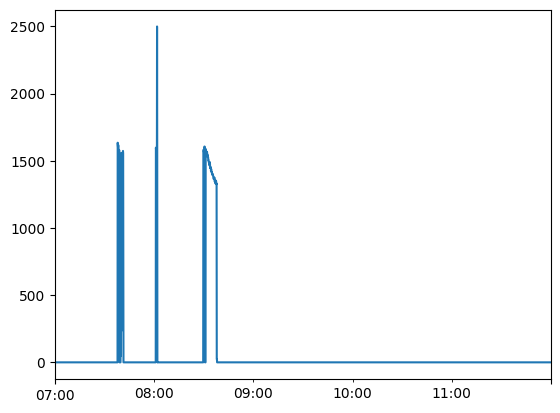

In [194]:
mw_series = power_elec[MICROWAVE].power_series_all_data(resample=True, sample_period=6, preprocessing = [clipper], ac_type='best')
# start = 1201000
start = 724200

mw_series = mw_series.iloc[start : start+WINDOW_LEN]

mw_series.plot()

In [195]:
app_series = [fridge_series, wm_series, kettle_series, dw_series, mw_series]

In [196]:
states = []
targets = []
unfiltered_power = []

normalizer = NormalizationHandler(mode="minmax", min_val=0, max_val=2500)

for app, series in zip(info["appliances"], app_series):
        unfiltered_power.append(np.array(series))
        filtered_data = quantile_filter_2(info["appliance_data"][app]["window"], series, p=50)

        info["appliance_data"][app]['min'] = 0.0
        info["appliance_data"][app]['max'] = float(filtered_data.max())
        info["appliance_data"][app]['on_power_threshold'] = power_elec[app].on_power_threshold()

        binarized_data = F.binarization(filtered_data, mode="threshold", threshold=power_elec[app].on_power_threshold())
        normalizer.select_mode(mode="minmax", min_val=info["appliance_data"][app]['min'], max_val=info["appliance_data"][app]['max'])
        normalized_data = normalizer.normalize(filtered_data)
        states.append(binarized_data)
        targets.append(normalized_data)

# zero, one = extract_states(states)
# state_plot(zero, one)

C:\Users\MTinaco\AppData\Local\Temp\ipykernel_16112\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")


In [197]:
states = np.stack(states).T
targets = np.stack(targets).T

In [198]:
mains = np.sum(unfiltered_power, axis=0)

In [199]:
mains_denoise = quantile_filter_2(10, mains, 50)
mains = mains-np.percentile(mains, 1)
mains = np.where(mains < mains_denoise, mains_denoise, mains)
mains = quantile_filter_2(10, mains, 50)

C:\Users\MTinaco\AppData\Local\Temp\ipykernel_16112\2094214197.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  new_mains = np.percentile(new_mains, p, axis=1, interpolation="nearest")


In [200]:
normalizer.select_mode(mode="minmax", min_val=mains_denoise.min(), max_val=mains_denoise.max())
norm_mains_denoise = normalizer.normalize(mains_denoise)

normalizer.select_mode(mode="minmax", min_val=mains.min(), max_val=mains.max())
norm_mains = normalizer.normalize(mains)

In [201]:
save_profile = True

In [202]:
if save_profile:
        ProfileHandler.mkdir(pathsman.PROFILES_DIR, exist_ok=True)
        prof = DatasetProfile(parent_dir=pathsman.PROFILES_DIR,
                        handler=NILMProjects.UNETNILM.value,
                        dataset_name="ukdale",
                        metadata=info,
                        mode="w")
        profile = ProfileHandler.write(norm_mains_denoise, norm_mains, targets, states, profile=prof, subdir="crossval")
        print(profile)

Full path: C:\Users\MTinaco\Dev\Solutions\cos-algo-nilm\profiles\unetnilm_ukdale_20240607_132352
                


In [203]:
profile = ProfileHandler.read("../profiles/unetnilm_ukdale_20240607_132352", subdir="crossval")

In [204]:
profile[4]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

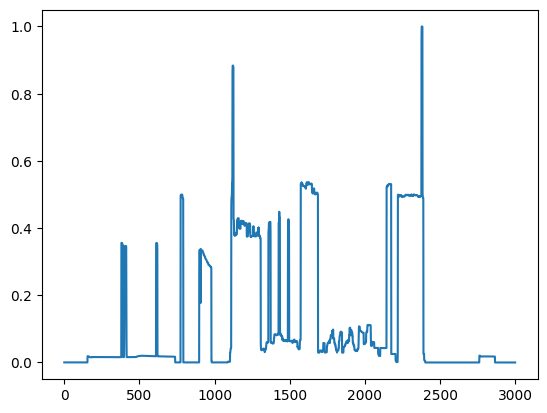

In [205]:
denoise_input = profile[1]
plt.plot(denoise_input)

In [206]:
input_length = denoise_input.shape[0]
input_signal = np.pad(denoise_input, pad_width=99, mode="constant", constant_values=0)

In [207]:
test_set = []

for i in range(input_length):
        rowarr = input_signal[i:i+100]
        rowarr = rowarr * 128
        rowarr = rowarr.astype(np.uint8)
        test_set.append(list(rowarr))

In [208]:
np.savetxt("../adinilm/firmware/max78000/dataset/arf_set_input.csv", test_set, delimiter=",", fmt='% s')

In [209]:
np.savetxt("../adinilm/firmware/max78000/dataset/arf_set_state.csv", profile[4], delimiter=",", fmt='% s')

In [210]:
rms_set = profile[3]
rms_set = rms_set * 128
rms_set = rms_set.astype(np.uint8)

In [211]:
np.savetxt("../adinilm/firmware/max78000/dataset/arf_set_rms.csv", rms_set, delimiter=",", fmt='% s')